In [1]:
%load_ext autoreload
%autoreload 1

import os
import random
import numpy as np
import matplotlib.pyplot as plt

import kornia

import torch
from torch.utils.data import DataLoader
import torchvision.transforms as T



%aimport DataScienceBowl
from DataScienceBowl import DataScienceBowl

# Harmless Transforms
%aimport Transforms
import Transforms as HT



In [2]:
# Set device to GPU if available
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('using cuda')
else:
    torch.device('cpu')
    print('using cpu')
    
# Set seeds
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

using cuda


In [3]:
def visual_transform(img, transform):
    
    img_hat = transform(img)
    
    print(torch.min(img_hat), torch.max(img_hat))
    
    f, a = plt.subplots(1,2)
    a[0].imshow(kornia.tensor_to_image(img), vmin=0, vmax=1)
    a[1].imshow(kornia.tensor_to_image(img_hat), vmin=0, vmax=1)
    
    return img_hat

In [4]:
# Define Transforms
# TODO Separate Train and Test transforms
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
#     T.ToTensor()
#     T.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

In [5]:
dataset = DataScienceBowl('data/data_science_train', transform=transform)

dataLoader = DataLoader(dataset, batch_size=1, shuffle=True)

In [87]:
i = int(random.random() * 670)
print(i)
img = dataset[i]['image']/255



trnsf = T.Compose([
    T.ColorJitter(hue=[-0.5,0.5])
])

img_hat = trnsf(img)


f,a = plt.subplots(1,2)
a[0].imshow(img.permute(1,2,0))
a[1].imshow(img_hat.permute(1,2,0))

176


SyntaxError: 'continue' not properly in loop (<ipython-input-87-df8b1813e127>, line 6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[ 3.1674, -2.8987,  0.9064],
         [-0.9258, -3.4152,  3.4635],
         [-3.0036,  0.2328,  3.4731]]])
tensor(0.0983) tensor(0.8404)
tensor(-0.1655) tensor(1.2713)
tensor(0.1833, grad_fn=<MinBackward1>) tensor(0.2029, grad_fn=<MaxBackward1>)
tensor(-0.0486) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.0997)


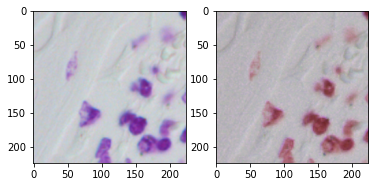

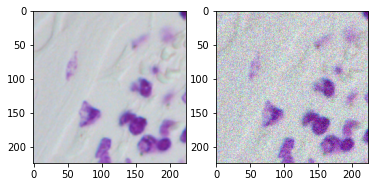

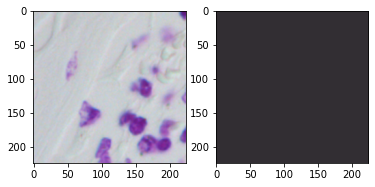

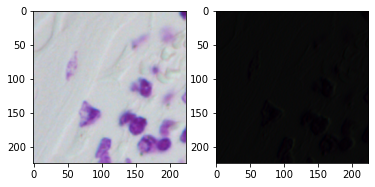

In [20]:
i = int(random.random() * 200)
i = 55
img = dataset[i]['image']/255

img = img.unsqueeze(0)

noise = torch.rand(1, 2, 224, 224, requires_grad=True)

Ts = [HT.ColorJitter(0.4, 0.4, 0.4, 0.3), HT.Noise(0, 0.1), HT.ElasticTransform(noise), HT.RandomConvolution()]

# print(Ts[3].random_kernel)

for t in Ts:
    visual_transform(img, t)


tensor(0.0086, grad_fn=<MinBackward1>) tensor(0.0111, grad_fn=<MaxBackward1>)


tensor([[[[0.0094, 0.0094, 0.0094,  ..., 0.0094, 0.0094, 0.0094],
          [0.0094, 0.0094, 0.0094,  ..., 0.0094, 0.0094, 0.0094],
          [0.0094, 0.0094, 0.0094,  ..., 0.0094, 0.0094, 0.0094],
          ...,
          [0.0094, 0.0094, 0.0094,  ..., 0.0094, 0.0094, 0.0094],
          [0.0094, 0.0094, 0.0094,  ..., 0.0094, 0.0094, 0.0094],
          [0.0094, 0.0094, 0.0094,  ..., 0.0094, 0.0094, 0.0094]],

         [[0.0111, 0.0111, 0.0111,  ..., 0.0111, 0.0111, 0.0111],
          [0.0111, 0.0111, 0.0111,  ..., 0.0111, 0.0111, 0.0111],
          [0.0111, 0.0111, 0.0111,  ..., 0.0111, 0.0111, 0.0111],
          ...,
          [0.0111, 0.0111, 0.0111,  ..., 0.0111, 0.0111, 0.0111],
          [0.0111, 0.0111, 0.0111,  ..., 0.0111, 0.0111, 0.0111],
          [0.0111, 0.0111, 0.0111,  ..., 0.0111, 0.0111, 0.0111]],

         [[0.0086, 0.0086, 0.0086,  ..., 0.0086, 0.0086, 0.0086],
          [0.0086, 0.0086, 0.0086,  ..., 0.0086, 0.0086, 0.0086],
          [0.0086, 0.0086, 0.0086,  ..., 0

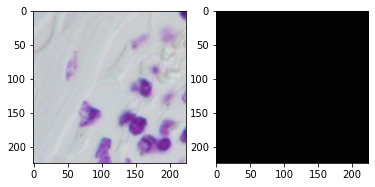

In [22]:
cell_transform = T.Compose(Ts)
visual_transform(img, cell_transform)

In [16]:
i = int(random.random() * 200)
print(i)

img = torch.zeros((224, 224))
img[::10, ::10] = 1
img = img.unsqueeze(0)
img = img.repeat(3,1,1)
img = img.unsqueeze(0)
# print(img.shape)

X_val = np.random.rand(1, 3, 200, 300)
X = torch.tensor(X_val, requires_grad=True)

# dY_val = numpy.random.rand(200, 300)


# plt.imshow(kornia.tensor_to_image(img))


displacement_val = np.random.randn(4, 1, 3, 3) * 5
displacement = torch.tensor(displacement_val)

etorch.deform_grid(X, displacement, order=3)


# noise = torch.zeros(1, 2, 224, 224)
# # sigma = torch.tensor([4., 4.])
# alpha = torch.tensor([32., 32.])
# t = HT.ElasticTransform(noise, (3,3), sigma, alpha, align_corners=True)
# img_hat = visual_transform(img, t)
# # img_hat.mean().backward()

# print(img_hat)

147


NameError: name 'etorch' is not defined

In [19]:
import elasticdeform.torch as etorch

X = np.zeros((200, 300))
X[::10, ::10] = 1

img_hat = elasticdeform.deform_random_grid(X, sigma=25, points=3)


f,a = plt.subplots(1,2)

a[0].imshow(X)
a[1].imshow(img_hat)


NameError: name 'elasticdeform' is not defined

In [59]:

img, img_hat

(tensor([[[0.0157, 0.0118, 0.0118,  ..., 0.0275, 0.0275, 0.0275],
          [0.0118, 0.0118, 0.0118,  ..., 0.0235, 0.0275, 0.0275],
          [0.0118, 0.0118, 0.0118,  ..., 0.0235, 0.0235, 0.0275],
          ...,
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
          [0.0118, 0.0157, 0.0118,  ..., 0.0078, 0.0078, 0.0078]],
 
         [[0.0157, 0.0118, 0.0118,  ..., 0.0275, 0.0275, 0.0275],
          [0.0118, 0.0118, 0.0118,  ..., 0.0235, 0.0275, 0.0275],
          [0.0118, 0.0118, 0.0118,  ..., 0.0235, 0.0235, 0.0275],
          ...,
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
          [0.0118, 0.0157, 0.0118,  ..., 0.0078, 0.0078, 0.0078]],
 
         [[0.0157, 0.0118, 0.0118,  ..., 0.0275, 0.0275, 0.0275],
          [0.0118, 0.0118, 0.0118,  ..., 0.0235, 0.0275, 0.0275],
          [0.0118, 0.0118, 0.0118,  ...,

In [60]:
torch.unique(img_hat)

tensor([0.0069, 0.0090, 0.0110, 0.0131, 0.0152, 0.0173, 0.0193, 0.0214, 0.0235,
        0.0256, 0.0276, 0.0297, 0.0318, 0.0339, 0.0359, 0.0380, 0.0401, 0.0421,
        0.0442, 0.0463, 0.0484, 0.0504, 0.0525, 0.0546, 0.0567, 0.0587, 0.0608,
        0.0629, 0.0650, 0.0670, 0.0691, 0.0712, 0.0733, 0.0753, 0.0774, 0.0795,
        0.0815, 0.0836, 0.0857, 0.0878, 0.0898, 0.0919, 0.0940, 0.0961, 0.0981,
        0.1002, 0.1023, 0.1044, 0.1064, 0.1085, 0.1106, 0.1127, 0.1147, 0.1168,
        0.1189, 0.1209, 0.1230, 0.1251, 0.1272, 0.1292, 0.1313, 0.1334, 0.1355,
        0.1375, 0.1396, 0.1417, 0.1438, 0.1458, 0.1479, 0.1500, 0.1521, 0.1541,
        0.1562, 0.1583, 0.1603, 0.1624, 0.1645, 0.1666, 0.1686, 0.1707, 0.1728,
        0.1749, 0.1769, 0.1790, 0.1811, 0.1832, 0.1852, 0.1873, 0.1894, 0.1915,
        0.1935, 0.1956, 0.1977, 0.1997, 0.2018, 0.2039, 0.2060, 0.2080, 0.2101,
        0.2122, 0.2143, 0.2163, 0.2184, 0.2205, 0.2246, 0.2267, 0.2288])